In [2]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

import glob
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [3]:
# Connecting google colab with kaggle account

os.environ['KAGGLE_USERNAME'] = 'mangeshwasu'
os.environ['KAGGLE_KEY'] = '30ba71645b158b5434b50aaa9b72e2c1'

In [4]:
# Downloading the data set

! kaggle datasets download tawsifurrahman/covid19-radiography-database

 99% 772M/778M [00:06<00:00, 184MB/s]
100% 778M/778M [00:06<00:00, 123MB/s]


In [ ]:
# unzip the folder

! unzip covid19-radiography-database.zip

**We are taking only Normal and Covid Xray images & build the model for predicting person has Covid or Not**

In [6]:
os.listdir('COVID-19_Radiography_Dataset/COVID')

['images', 'masks']

In [7]:
print(f"Total Covid Xray images are\
 {len(os.listdir('COVID-19_Radiography_Dataset/COVID/images'))}")

Total Covid Xray images are 3616


In [8]:
print(f"Total Normal Xray images are\
 {len(os.listdir('COVID-19_Radiography_Dataset/Normal/images'))}")

Total Normal Xray images are 10192


**Data is highly imbalance**

In [9]:
 # Reeading the image

img=cv2.imread('COVID-19_Radiography_Dataset/Normal/images/Normal-1000.png')

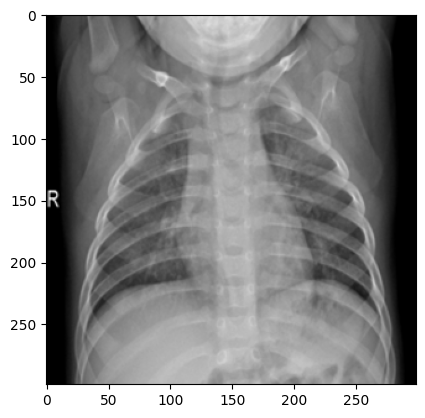

In [10]:
# Ploting the image

plt.imshow(img);

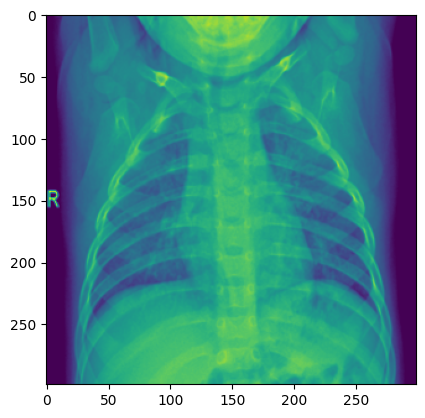

In [11]:
plt.imshow(img[:,:,1])

In [12]:
img.shape

(299, 299, 3)

In [13]:
# Loading covid image

list_covid=glob.glob('/content/COVID-19_Radiography_Dataset/COVID/images/*')

labels=['Covid','Normal']


x=[]
y=[]

for dir in list_covid:
    y.append(1)
    img=cv2.imread(dir)
    img=tf.keras.preprocessing.image.img_to_array(img)
    img=cv2.resize(img,(100,100))
    img/255  # Normalization
    x.append((img))

len(x),len(y)

(3616, 3616)

In [14]:
# Loading normal image

list_normal=glob.glob('/content/COVID-19_Radiography_Dataset/Normal/images/*')

for dir in list_normal:
    y.append(0)
    img=cv2.imread(dir)
    img=tf.keras.preprocessing.image.img_to_array(img)
    img=cv2.resize(img,(100,100))
    img/255  # Normalization
    x.append((img))

len(x)


13808

In [15]:
# Reshaping the data

x = np.array(x)
y = np.array(y).reshape(-1,1)

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

print(x_train.shape)
print(x_test.shape)

(12427, 100, 100, 3)
(1381, 100, 100, 3)


## Model 

In [41]:
model = Sequential([
    Conv2D(32,3,input_shape=(100,100,3),activation='relu'),
    MaxPooling2D(),
    Conv2D(16,3,activation='relu'),
    MaxPooling2D(),
    Conv2D(16,3,activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(256,activation='relu'),
    #Dense(128,activation='relu'),
    Dense(1, activation='sigmoid')
])

In [42]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 23, 23, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 21, 21, 16)        2320      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 10, 10, 16)      

In [43]:
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [44]:
model.fit(x_train,y_train,batch_size=32,epochs=8,validation_data=(x_test,y_test))

Epoch 1/8
389/389 [==============================] - 7s 12ms/step - loss: 0.8871 - accuracy: 0.8030 - val_loss: 0.3133 - val_accuracy: 0.8530
Epoch 2/8
389/389 [==============================] - 4s 10ms/step - loss: 0.2780 - accuracy: 0.8774 - val_loss: 0.2811 - val_accuracy: 0.8747
Epoch 3/8
389/389 [==============================] - 4s 10ms/step - loss: 0.2308 - accuracy: 0.9042 - val_loss: 0.2927 - val_accuracy: 0.8769
Epoch 4/8
389/389 [==============================] - 4s 10ms/step - loss: 0.2136 - accuracy: 0.9087 - val_loss: 0.2413 - val_accuracy: 0.9059
Epoch 5/8
389/389 [==============================] - 4s 10ms/step - loss: 0.1705 - accuracy: 0.9309 - val_loss: 0.2413 - val_accuracy: 0.9117
Epoch 6/8
389/389 [==============================] - 4s 10ms/step - loss: 0.1461 - accuracy: 0.9394 - val_loss: 0.3265 - val_accuracy: 0.8610
Epoch 7/8
389/389 [==============================] - 4s 11ms/step - loss: 0.1252 - accuracy: 0.9485 - val_loss: 0.2319 - val_accuracy: 0.9109
Epoch 

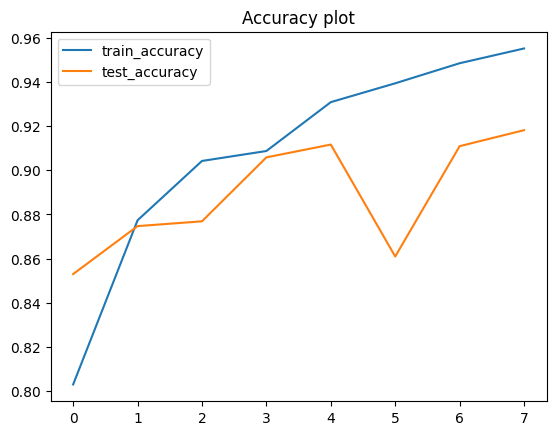

In [45]:
plt.plot(model.history.history['accuracy'],label='train_accuracy')
plt.plot(model.history.history['val_accuracy'],label='test_accuracy')
plt.legend()
plt.title("Accuracy plot")
plt.show()

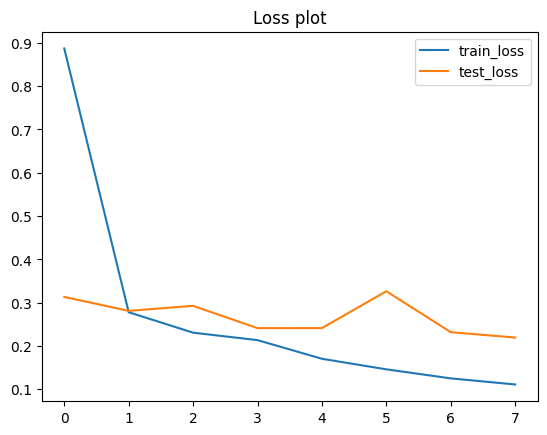

In [46]:
plt.plot(model.history.history['loss'],label='train_loss')
plt.plot(model.history.history['val_loss'],label='test_loss')
plt.legend()
plt.title("Loss plot")
plt.show()

In [47]:
y_hat = model.predict(x_test)


def predict(y_hat):
    y_hat[y_hat >= 0.5] =1
    y_hat[y_hat<0.5] =0
    return y_hat
y_pred = predict(y_hat)


from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

44/44 [==============================] - 0s 4ms/step
0.9181752353367125


In [48]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

labels = ['Covid', 'Normal']
report = classification_report(y_test, y_pred, target_names=labels)
print(report)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

              precision    recall  f1-score   support

       Covid       0.95      0.93      0.94      1015
      Normal       0.83      0.87      0.85       366

    accuracy                           0.92      1381
   macro avg       0.89      0.90      0.90      1381
weighted avg       0.92      0.92      0.92      1381

Accuracy: 0.9181752353367125
